In [291]:
import bamboolib as bam
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns

In [172]:
df = pd.read_csv("adult-all.csv")

In [320]:
df

       Age         Workclass  Education  Education-Num      Marital-Status  \
0       39         State-gov  Bachelors             13       Never-married   
1       50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2       38           Private    HS-grad              9            Divorced   
3       53           Private       11th              7  Married-civ-spouse   
4       28           Private  Bachelors             13  Married-civ-spouse   
...    ...               ...        ...            ...                 ...   
48836   33           Private  Bachelors             13       Never-married   
48837   39           Private  Bachelors             13            Divorced   
48839   38           Private  Bachelors             13  Married-civ-spouse   
48840   44           Private  Bachelors             13            Divorced   
48841   35      Self-emp-inc  Bachelors             13  Married-civ-spouse   

              Occupation   Relationship                Race    

In [174]:
df.to_csv("adult-all.csv", header=["Age","Workclass","fnlwgt","Education","Education-Num","Marital-Status","Occupation","Relationship","Race","Sex","CapitalGain","CapitalLoss","Hours-per-week","NativeCountry","Salary"], index =False)

In [175]:
df

       Age         Workclass  fnlwgt  Education  Education-Num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64                 ?  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           Marital-Status         Occupation    Relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

In [176]:
df= df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [177]:
df

       Age         Workclass  fnlwgt  Education  Education-Num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64                 ?  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           Marital-Status         Occupation    Relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

In [178]:
df.describe()

                Age        fnlwgt  Education-Num   CapitalGain   CapitalLoss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       Hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education-Num   48842 non-null  int64 
 5   Marital-Status  48842 non-null  object
 6   Occupation      48842 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  CapitalGain     48842 non-null  int64 
 11  CapitalLoss     48842 non-null  int64 
 12  Hours-per-week  48842 non-null  int64 
 13  NativeCountry   48842 non-null  object
 14  Salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [180]:
df.nunique()

Age                  74
Workclass             9
fnlwgt            28523
Education            16
Education-Num        16
Marital-Status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
CapitalGain         123
CapitalLoss          99
Hours-per-week       96
NativeCountry        42
Salary                2
dtype: int64

In [181]:
m_v = ["n/a", "na", "missing"]
df = pd.read_csv("adult-all.csv", na_values = m_v)

In [182]:
m_data = df.isnull().sum()
m_data

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Marital-Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
CapitalGain       0
CapitalLoss       0
Hours-per-week    0
NativeCountry     0
Salary            0
dtype: int64

In [183]:
df[df=='?'].count()

Age                  0
Workclass         2799
fnlwgt               0
Education            0
Education-Num        0
Marital-Status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
CapitalGain          0
CapitalLoss          0
Hours-per-week       0
NativeCountry      857
Salary               0
dtype: int64

In [184]:
df= pd.DataFrame(df)
df = df[(df.Workclass != "?")&(df.Occupation != "?")&(df.NativeCountry != "?")]

In [185]:
df

       Age         Workclass  fnlwgt  Education  Education-Num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48836   33           Private  245211  Bachelors             13   
48837   39           Private  215419  Bachelors             13   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           Marital-Status         Occupation   Relationship  \
0           Never-married       Adm-clerical  Not-in-family   
1      Married-civ-spouse    Exec-managerial        Husband   
2                D

In [186]:
df.describe()

                Age        fnlwgt  Education-Num   CapitalGain   CapitalLoss  \
count  45222.000000  4.522200e+04   45222.000000  45222.000000  45222.000000   
mean      38.547941  1.897347e+05      10.118460   1101.430344     88.595418   
std       13.217870  1.056392e+05       2.552881   7506.430084    404.956092   
min       17.000000  1.349200e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.173882e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783160e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.379260e+05      13.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       Hours-per-week  
count    45222.000000  
mean        40.938017  
std         12.007508  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

In [187]:
df.corr()

                     Age    fnlwgt  Education-Num  CapitalGain  CapitalLoss  \
Age             1.000000 -0.075792       0.037623     0.079683     0.059351   
fnlwgt         -0.075792  1.000000      -0.041993    -0.004110    -0.004349   
Education-Num   0.037623 -0.041993       1.000000     0.126907     0.081711   
CapitalGain     0.079683 -0.004110       0.126907     1.000000    -0.032102   
CapitalLoss     0.059351 -0.004349       0.081711    -0.032102     1.000000   
Hours-per-week  0.101992 -0.018679       0.146206     0.083880     0.054195   

                Hours-per-week  
Age                   0.101992  
fnlwgt               -0.018679  
Education-Num         0.146206  
CapitalGain           0.083880  
CapitalLoss           0.054195  
Hours-per-week        1.000000  

In [188]:
df["Salary"].value_counts()

<=50K    34014
>50K     11208
Name: Salary, dtype: int64

In [189]:
df["Hours-per-week"].value_counts()

40    21358
50     4094
45     2602
60     2085
35     1776
      ...  
87        1
94        1
82        1
79        1
69        1
Name: Hours-per-week, Length: 96, dtype: int64

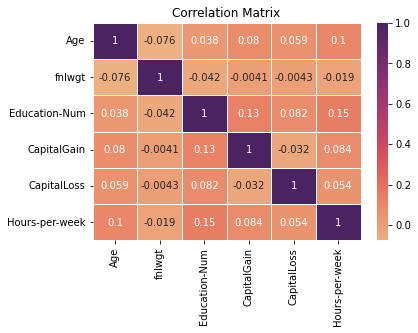

In [190]:
sns.heatmap(data= df.corr(), annot=True, linewidth = 1, cmap = "flare")
plt.title("Correlation Matrix")
plt.show()

In [191]:
df=df.drop("fnlwgt", axis =1)

In [192]:
df.corr()

                     Age  Education-Num  CapitalGain  CapitalLoss  \
Age             1.000000       0.037623     0.079683     0.059351   
Education-Num   0.037623       1.000000     0.126907     0.081711   
CapitalGain     0.079683       0.126907     1.000000    -0.032102   
CapitalLoss     0.059351       0.081711    -0.032102     1.000000   
Hours-per-week  0.101992       0.146206     0.083880     0.054195   

                Hours-per-week  
Age                   0.101992  
Education-Num         0.146206  
CapitalGain           0.083880  
CapitalLoss           0.054195  
Hours-per-week        1.000000  

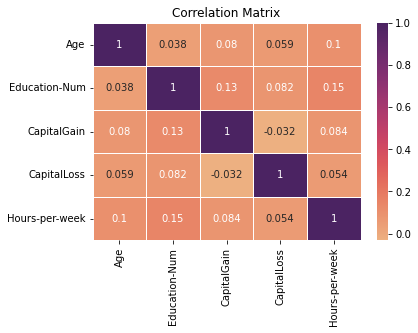

In [193]:
sns.heatmap(data= df.corr(), annot=True, linewidth = 1, cmap = "flare")
plt.title("Correlation Matrix")
plt.show()

In [194]:
df["Sex"].value_counts()

Male      30527
Female    14695
Name: Sex, dtype: int64

In [195]:
df["Race"].value_counts()

White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: Race, dtype: int64

In [221]:
df["Salary"].value_counts()

<=50K    34014
>50K     11208
Name: Salary, dtype: int64

In [197]:
df["Occupation"].value_counts()

Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: Occupation, dtype: int64

In [198]:
df["Marital-Status"].value_counts()

Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: Marital-Status, dtype: int64

In [199]:
df["Education"].value_counts()

HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: Education, dtype: int64

In [200]:
df["NativeCountry"].value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

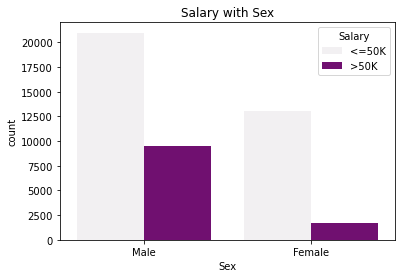

<Figure size 1728x1728 with 0 Axes>

In [225]:
sns.countplot(x ='Sex', hue = "Salary", data = df, color = "purple")
plt.title("Salary with Sex")
plt.figure(figsize=(24, 24))
# Show the plot
plt.show()

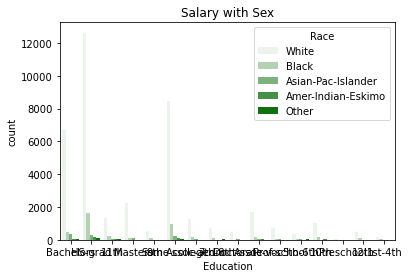

<Figure size 7488x1728 with 0 Axes>

In [223]:
sns.countplot(x ='Education', hue = "Race", data = df, color = "green")
plt.title("Salary with Sex")
plt.figure(figsize=(104, 24))
# plt.lim("White", "Black", "Asian-Pac-Islander")
# Show the plot
plt.show()

Text(0.5, 1.0, 'Box Plot: Age with Salary')

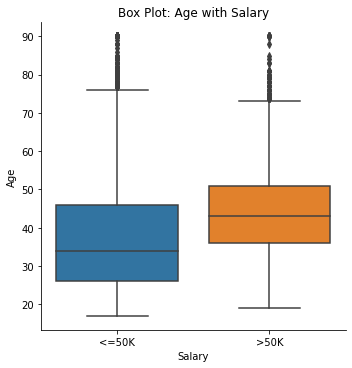

In [233]:
sns.catplot(data=df, x="Salary", y="Age", kind="box")
plt.title("Box Plot: Age with Salary")

Text(0.5, 1.0, 'Box Plot: Weekly working Hours')

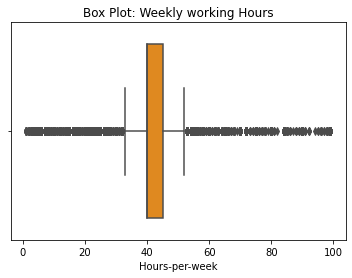

In [321]:
sns.boxplot(data= df, x = 'Hours-per-week', color = "darkorange")
plt.title("Box Plot: Weekly working Hours")

Text(0.5, 1.0, 'Box Plot: Age')

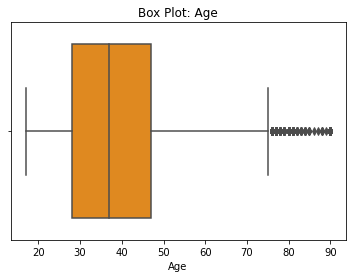

In [322]:
sns.boxplot(data= df, x = 'Age', color = "darkorange")
plt.title("Box Plot: Age")

In [208]:
df_s= pd.get_dummies(df['Salary'],drop_first= True)

In [209]:
df_s

       >50K
0         0
1         0
2         0
3         0
4         0
...     ...
48836     0
48837     0
48839     0
48840     0
48841     1

[45222 rows x 1 columns]

In [210]:
df_g= pd.get_dummies(df[['Sex']],drop_first= True)

In [211]:
df_g

       Sex_Male
0             1
1             1
2             1
3             1
4             0
...         ...
48836         1
48837         0
48839         1
48840         1
48841         1

[45222 rows x 1 columns]

In [218]:
df.loc[df['Hours-per-week'] < 40, 'Hours'] = 0
df.loc[df['Hours-per-week'] >= 40, 'Hours'] = 1
df.loc[df['Education-Num'] < 10, 'Edu'] = 0 
df.loc[df['Education-Num'] >= 10, 'Edu'] = 1
df.loc[df['Age'] < 75, 'age'] = 1 
df.loc[df['Age'] >= 75, 'age'] = 0

In [219]:
df_g['Hours'] =df['Hours']
df_g['Edu']= df['Edu']
df_g['age'] = df['age']

In [220]:
df_g['Hours']

0        1.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
48836    1.0
48837    0.0
48839    1.0
48840    1.0
48841    1.0
Name: Hours, Length: 45222, dtype: float64

In [164]:
df[['Workclass','NativeCountry','Occupation','Salary','Race']].apply(pd.Series.value_counts)

                    Workclass  NativeCountry  Occupation   Salary     Race
<=50K                     NaN            NaN         NaN  34014.0      NaN
>50K                      NaN            NaN         NaN  11208.0      NaN
Adm-clerical              NaN            NaN      5540.0      NaN      NaN
Amer-Indian-Eskimo        NaN            NaN         NaN      NaN    435.0
Armed-Forces              NaN            NaN        14.0      NaN      NaN
...                       ...            ...         ...      ...      ...
United-States             NaN        41292.0         NaN      NaN      NaN
Vietnam                   NaN           83.0         NaN      NaN      NaN
White                     NaN            NaN         NaN      NaN  38903.0
Without-pay              21.0            NaN         NaN      NaN      NaN
Yugoslavia                NaN           23.0         NaN      NaN      NaN

[69 rows x 5 columns]

In [234]:
df_g=df_g.astype('int')

In [235]:
df_g

       Sex_Male  Hours  Edu  age
0             1      1    1    1
1             1      0    1    1
2             1      1    0    1
3             1      1    0    1
4             0      1    1    1
...         ...    ...  ...  ...
48836         1      1    1    1
48837         0      0    1    1
48839         1      1    1    1
48840         1      1    1    1
48841         1      1    1    1

[45222 rows x 4 columns]

In [294]:
X_train, X_test, y_train, y_test = train_test_split(df_s, df_g, test_size=0.2, random_state= 100)

In [295]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=10, n_estimators=50, random_state= 123)
rf.fit(X_test, y_test)  
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)

[1.]


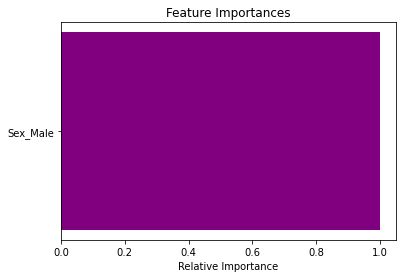

In [296]:
features = y_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [297]:
knn= KNeighborsClassifier(n_neighbors=212,weights='uniform')
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [298]:
knn_score = knn.score(X_test, y_test)
knn_score

0.35964621337755664

In [300]:
pred= knn.predict(X_test)

In [303]:
pred

array([[0, 1, 0, 1],
       [1, 1, 1, 1],
       [0, 1, 0, 1],
       ...,
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1]])

In [318]:
error_rate = []
# Might take some time
for i in range(25,50):
    
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

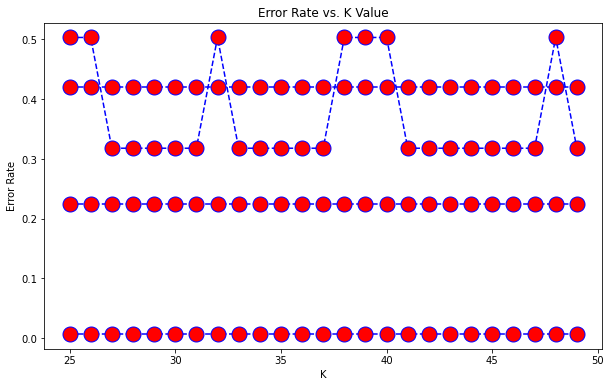

In [319]:
plt.figure(figsize=(10,6))
plt.plot(range(25,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=15)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [309]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

In [310]:
pred

array([[0, 1, 0, 1],
       [0, 1, 1, 1],
       [0, 1, 0, 1],
       ...,
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1]])